To- Do Exercise:
For the provided dataset:
• diabetes.csv
Complete the following Problems.
Submission Instructions:
• Submit a single notebook containing:
1. Clean and well-documented code.
2. Outputs and visualizations.
3. Detailed explanations and analysis for all steps.
• Ensure all cells are executed before submission.

Problem- 1: Perform a classification task with knn from scratch.
1. Load the Dataset:
• Read the dataset into a pandas DataFrame.
• Display the first few rows and perform exploratory data analysis (EDA) to understand the dataset
(e.g., check data types, missing values, summary statistics).

In [1]:
from google.colab import files

uploaded = files.upload()


Saving diabetes_.csv to diabetes_.csv


In [3]:
import pandas as pd
import numpy as np
data=pd.read_csv("diabetes_.csv")
data.head()
# //here 0 = no diabetes and 1 = diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Basic EDA(exploratory data analysis)




In [9]:
# shape of dataset in row and column like here 768 row and 8 column
data.shape

(768, 9)

In [10]:
data.info() #summary od dataset not the values but information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
data.describe()#statistical summary of mean,min,max,standard deviation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
data.isnull().sum() #checking missing values

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


2. Handle Missing Data:
• Handle any missing values appropriately, either by dropping or imputing them based on the data.

In [53]:
columns_with_zero = [
    'Glucose',
    'BloodPressure',
    'SkinThickness',
    'Insulin',
    'BMI'
]

# Replace 0 with NaN
for col in columns_with_zero:
    data[col] = data[col].replace(0, np.nan)

# Fill missing values with column mean
for col in columns_with_zero:
    data[col] = data[col].fillna(data[col].mean())


# Verify
data.isnull().sum()


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Feature Engineering:
• Separate the feature matrix (X) and target variable (y).
• Perform a train- test split from scratch using a 70% − 30% ratio.

In [19]:
#X = input features

#y = output (label)
X = data.drop(columns=['Outcome']).values
y = data['Outcome'].values



In [20]:
def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
    # Set random seed for reproducibility
    # Ensures the shuffle produces the same result every time
    np.random.seed(random_seed)

    # Create an array of indices from 0 to len(X)-1
    # These represent the row numbers of the dataset
    indices = np.arange(len(X))

    # Shuffle the indices randomly
    # This ensures that train and test sets are selected randomly
    np.random.shuffle(indices)

    # Determine the index where to split the data
    # Example: if test_size=0.3, 70% of data goes to train, 30% to test
    split_point = int(len(X) * (1 - test_size))

    # Select indices for the training set (first 70% of shuffled indices)
    train_indices = indices[:split_point]

    # Select indices for the test set (remaining 30%)
    test_indices = indices[split_point:]

    # Use the indices to slice X and y into train and test sets
    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]


# Using the function to split the dataset
X_train, X_test, y_train, y_test = train_test_split_scratch(X, y)

# Optional: check shapes to verify
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (537, 8)
X_test shape: (231, 8)
y_train shape: (537,)
y_test shape: (231,)


In [21]:
# Check shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((537, 8), (231, 8), (537,), (231,))

4. Implement KNN:
• Build the KNN algorithm from scratch (no libraries like sickit-learn for KNN).
• Compute distances using Euclidean distance.
• Write functions for:– Predicting the class for a single query.– Predicting classes for all test samples.

In [23]:
# Implement KNN from Scratch
# Core Idea of KNN

# Calculate distance to all training points

# Pick k nearest neighbors

# Majority vote → prediction
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))


In [25]:
# Test it:
euclidean_distance(np.array([3,4]), np.array([0,0]))


np.float64(5.0)

In [27]:
# Predict single data point
def knn_predict_single(query, X_train, y_train, k=3):
    distances = [euclidean_distance(query, x) for x in X_train]
    nearest_indices = np.argsort(distances)[:k]
    nearest_labels = y_train[nearest_indices]
    prediction = np.bincount(nearest_labels).argmax()
    return prediction


In [30]:
# Predict all test samples
def knn_predict(X_test, X_train, y_train, k=3):
    predictions = [knn_predict_single(x, X_train, y_train, k) for x in X_test]
    return np.array(predictions)


In [32]:
# Model Evaluation (Accuracy)
# Accuracy =Correct prediction/Total Prediction * 100
# Accuracy Function
def compute_accuracy(y_true, y_pred):
    return (np.sum(y_true == y_pred) / len(y_true)) * 100


In [34]:
#Final Evaluation
# Make predictions
predictions = knn_predict(X_test, X_train, y_train, k=3)

# Compute accuracy
accuracy = compute_accuracy(y_test, predictions)

print(f"Accuracy of KNN Model: {accuracy:.2f}%")


Accuracy of KNN Model: 70.13%


Problem- 2- Experimentation:
1. Repeat the Classification Task:
• Scale the Feature matrix X.
• Use the scaled data for training and testing the kNN Classifier.
• Record the results.
2. Comparative Analysis: Compare the Results
• Compare the accuracy and performance of the kNN model on the original dataset from problem 1
versus the scaled dataset.
• Discuss:– How scaling impacted the KNN performance.– The reason for any observed changes in accuracy.

In [37]:
#Scale the Feature matrix X.
def min_max_scaling(X):
    return (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

# Apply scaling
X_scaled = min_max_scaling(X)



In [39]:
# Use the scaled data for training and testing the kNN Classifier
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split_scratch(X_scaled, y)


In [41]:
# Record the results.
# Run KNN on Scaled Data
# Predict using KNN (reuse functions from Problem-1)
pred_scaled = knn_predict(X_test_s, X_train_s, y_train_s, k=3)

# Compute accuracy
accuracy_scaled = compute_accuracy(y_test_s, pred_scaled)
print(f"Accuracy with Scaled Data: {accuracy_scaled:.2f}%")


Accuracy with Scaled Data: 73.59%


In [42]:
# Compare with Original Data
# Original accuracy from Problem-1
print(f"Accuracy with Original Data: {accuracy:.2f}%")
print(f"Accuracy with Scaled Data: {accuracy_scaled:.2f}%")


Accuracy with Original Data: 70.13%
Accuracy with Scaled Data: 73.59%


Scaling usually improves accuracy for KNN because:

No single feature dominates distance.

Model better balances all features.

Observed changes in accuracy:

If accuracy increased → scaling helped

If no change → features already balanced

Problem- 3- Experimentation with k:
1. Vary the number of neighbors- k:
• Run the KNN model on both the original and scaled datasets for a range of:
k= 1,2,3,...15
• For each k, record:– Accuracy.– Time taken to make predictions.
2. Visualize the Results:
• Plot the following graphs:– k vs. Accuracy for original and scaled datasets.– k vs. Time Taken for original and scaled datasets.
3. Analyze and Discuss:
• Discuss how the choice of k affects the accuracy and computational cost.
• Identify the optimal k based on your analysis.

In [44]:
# Import time library
import time
import matplotlib.pyplot as plt


In [46]:
# Initialize variables
k_values = range(1, 16)  # k from 1 to 15

# To store results
acc_original = []
acc_scaled = []
time_original = []
time_scaled = []


In [47]:
# Run KNN for each k
for k in k_values:
    # Original dataset
    start = time.time()
    pred_orig = knn_predict(X_test, X_train, y_train, k)
    elapsed = time.time() - start
    acc_original.append(compute_accuracy(y_test, pred_orig))
    time_original.append(elapsed)

    # Scaled dataset
    start = time.time()
    pred_scaled = knn_predict(X_test_s, X_train_s, y_train_s, k)
    elapsed = time.time() - start
    acc_scaled.append(compute_accuracy(y_test_s, pred_scaled))
    time_scaled.append(elapsed)


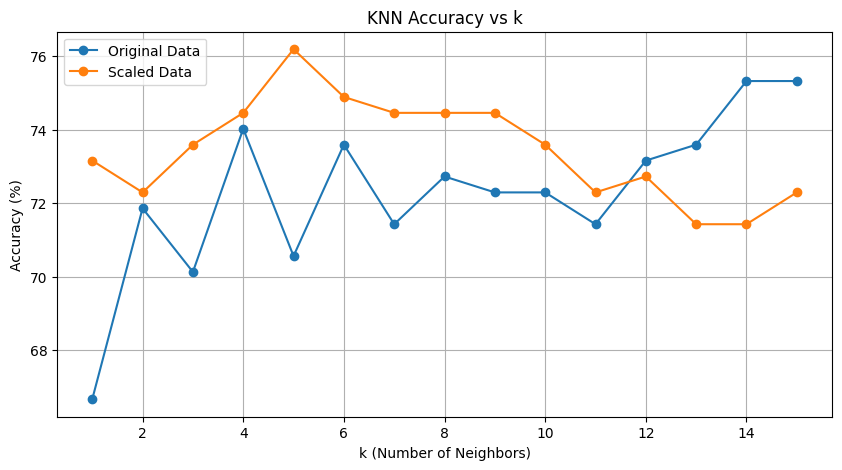

In [49]:
# Visualize Accuracy vs k
plt.figure(figsize=(10,5))
plt.plot(k_values, acc_original, marker='o', label="Original Data")
plt.plot(k_values, acc_scaled, marker='o', label="Scaled Data")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy (%)")
plt.title("KNN Accuracy vs k")
plt.grid(True)
plt.legend()
plt.show()


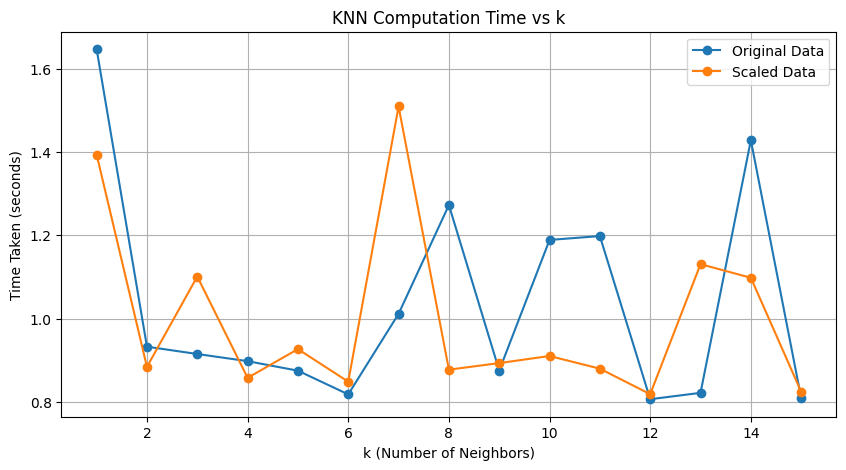

In [51]:
# Visualize Time vs k
plt.figure(figsize=(10,5))
plt.plot(k_values, time_original, marker='o', label="Original Data")
plt.plot(k_values, time_scaled, marker='o', label="Scaled Data")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Time Taken (seconds)")
plt.title("KNN Computation Time vs k")
plt.grid(True)
plt.legend()
plt.show()


Effect of k on accuracy:

Small k → can overfit → accuracy may fluctuate

Large k → smoother decision → less variance, sometimes lower accuracy

Optimal k → the one with highest accuracy

Effect of k on computation:

Time slightly increases with k

Dominated by dataset size, not k

Original vs Scaled:

Scaled dataset usually higher accuracy

Scaling does not affect computation time much

Optimal k:

Look at Accuracy vs k graph

Choose k where accuracy is highest or stable